# Instruções da prova

- O único material que poderá ser consultado é este notebook, consultas à outros materiais ou à internet será considerado cola
- Renomear o notebook para C209-PVL2-NOME_SOBRENOME_MATRICULA

# Parte teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas

1 - A compressão do tipo JPEG tem o enfoque em tirar de uma imagem suas **componentes de crominância** já que crominância é um fator muito perceptível para o ser humano.

In [ ]:
#Falso, crominancia é pouco preceptivel para o ser humano

2 - É correto afirmar que o código abaixo irá reproduzir um **áudio mais grave** que sua versão original:

```python 
sd.play(audio, 2*fs)
```

In [ ]:
#Falso, o som sera reproduzido de uma maneira mais aguda

3 - Arquivos de formato **RAW** se caracterizam por serem **muito pesados** em questão de armazenamento uma vez que não apresentam praticamente **nenhuma compressão**.

In [ ]:
#Verdadeiro

4 - A compressão de dados **Huffman** consiste em calcular a **probabilidade de uma cor aparecer em uma imagem** e a partir disso determinar códigos com **peso menor** que representem as **imagems com probabilidade maior** de aparecer.

In [ ]:
#Verdadeiro

5 - A compressão do tipo **Fractal** consiste em separar a imagem em blocos de mesmo tamanho (ex: 5x5, 8x8), e tornar esses blocos homogêneos, repetindo um mesmo valor de cor para todos os pixels desse bloco.

In [ ]:
#Falso, a compressao fractal consiste de usar um fragmento da imagem para representar outro

# Parte prática

## Material de apoio

### Importações

```python
    import moviepy.editor as mpe
    import numpy as np
    import matplotlib.pyplot as plt
```


### Manipulação de imagens

```python
    (l,c,p) = img.shape
    plt.imshow(imagem)
```

### Forçando uma imagem de uma página para 3 páginas
```python
    imagem_3p = np.zeros(shape=(l,c,p),dtype=np.uint8)
    imagem_3p[:,:, 0] = imagem_1p
    imagem_3p[:,:, 1] = imagem_1p
    imagem_3p[:,:, 2] = imagem_1p
```

### Detecção de bordas
```python
    imagem_grey = np.average(frame, axis=2).astype(np.float64)
   
    abs_tg_c = np.abs(np.diff(imagem_grey.astype(np.float64), axis=0, append=255))
    abs_tg_l = np.abs(np.diff(imagem_grey.astype(np.float64), axis=1, append=255))
    abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)

    imagem_border = np.zeros(shape=(l, c), dtype=np.uint8)
    imagem_border[abs_tg > threshold] = 255
```

### Manipulação de vídeo
```python
    video = mpe.VideoFileClip("video.mp4")
    frame = video.get_frame(2 / video.fps)
    frame = video.get_frame(2)
    video.ipython_display(width=480)
    video_modificado = video.fl_image(func_modificar)
    subclip = video.subclip(0,2)
    subclip = video.subclip(3)
    parts = mpe.concatenate_videoclips([part1, part])
    video.write_videofile('video.mp4')
```

### Tintura

```python
    grayscale = np.average(image, axis=2)
    tinted = np.zeros(shape=image.shape, dtype=np.uint8)

    # laranja em RGB: (255, 127, 0)
    tinted[:, :, 0] = grayscale * (255 / 255)
    # escala verde em 127 / 255 ~= 0.5
    tinted[:, :, 1] = grayscale * (127 / 255)
    # escala azul em 0 / 255 = 0
    tinted[:, :, 2] = grayscale * (  0 / 255)
```

### Grayscale

#### Algoritmo genérico, substituir o método escolhido
```python
    img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            r = float(img_np[i, j, 0])
            g = float(img_np[i, j, 1])
            b = float(img_np[i, j, 2])

            img_avg[i, j] = (aplicar método)
```

#### Métodos: 

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$

#### Utilizando o numpy:

Avarage: 
```python
gray = np.average(img,axis=2)
```

Luminosity: 
```python
gray = ((0.2126 * img[:, :, 0]) + (0.7152 * img[:, :, 1]) + (0.0722 * img[:, :, 2])).astype(np.uint8)
```

In [ ]:
%pip install moviepy==1.0.3

**1 -** Importe as bibliotecas que serão usadas

In [2]:
import moviepy.editor as mpe
import numpy as np
import matplotlib.pyplot as plt

**2** - Abra o vídeo **"copa.mp4"**, selecione o **frame de índice 4** e o exiba.

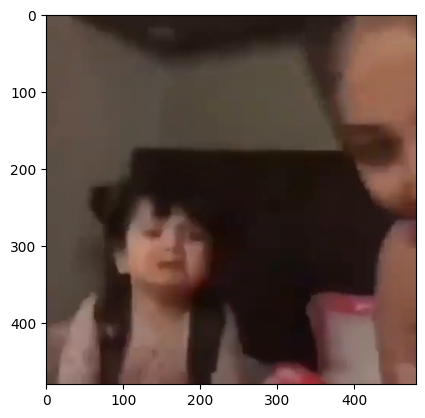

In [24]:
video = mpe.VideoFileClip("awa.mp4")
frame = video.get_frame(4/video.fps)
plt.imshow(frame)

**3 -** Crie uma função que receba **uma imagem e retorne essa imagem em escala de cinza**, faça as alterações necessárias para que a imagem **retornada tenha 3 páginas e não apenas 1**. Aplique essa função no frame selecionado na questão anterior e **mostre o resultado**.

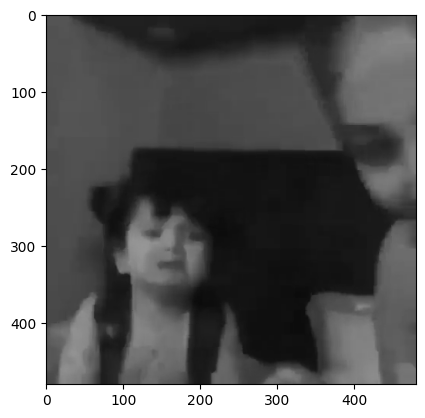

In [27]:
def greyscale(img):
  l, c, p  = img.shape
  img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
  grey = np.zeros(shape=(l,c,p),dtype=np.uint8)
  for i in range(l):
    for j in range(c):
      r = float(img[i, j, 0])
      g = float(img[i, j, 1])
      b = float(img[i, j, 2])
      img_avg[i, j] = (r+g+b)/3
      grey[i,j, 0] = img_avg[i, j]
      grey[i,j, 1] = img_avg[i, j]
      grey[i,j, 2] = img_avg[i, j]
  return grey
  
plt.imshow(greyscale(frame))

**4 -** Crie uma função que receba **uma imagem como parâmetro** e realize a operação de **tintura com a cor RGB(34,214,55)**, e retorne essa imagem com tintura. Aplique essa função no frame selecionado na questão 2 e **mostre o resultado**.

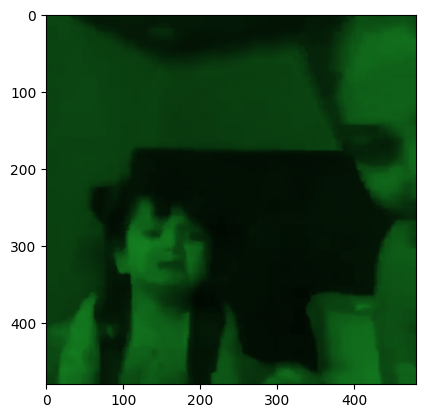

In [28]:
def tintura(img):
  grayscale = np.average(img, axis=2)
  tinted = np.zeros(shape=img.shape, dtype=np.uint8)

  tinted[:, :, 0] = grayscale * (34 / 255)
  tinted[:, :, 1] = grayscale * (214 / 255)
  tinted[:, :, 2] = grayscale * (  55 / 255)

  return tinted

plt.imshow(tintura(frame))

**5 -** Crie uma função que r**eceba uma imagem como parâmetro** e **retorne sua versão com as bordas detectadas**, com **threshold de 8**. Aplique essa função no frame selecionado na questão 2 e **mostre o resultado**.

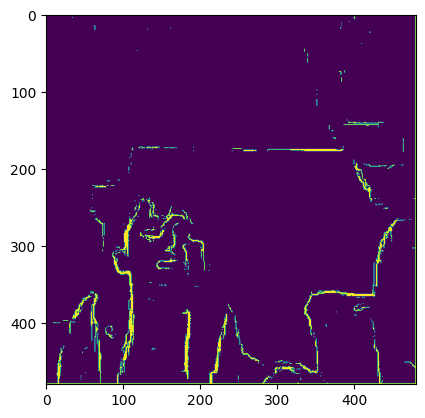

In [34]:
def borda(img):
  l, c, p  = img.shape
  imagem_grey = np.average(img, axis=2).astype(np.float64)

  abs_tg_c = np.abs(np.diff(imagem_grey.astype(np.float64), axis=0, append=255))
  abs_tg_l = np.abs(np.diff(imagem_grey.astype(np.float64), axis=1, append=255))
  abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)

  imagem_border = np.zeros(shape=(l, c), dtype=np.uint8)
  imagem_border[abs_tg > 8] = 255
  
  return imagem_border

plt.imshow(borda(frame))

**6 -** Particione o vídeo em **subclips e aplique as funções** acima da seguinte forma:
- 0s a 3s: Detecção de bordas
- 3s as 5s: Tintura
- 5s até o final: Escala de cinza

**Em seguida junte esses 3 trechos em um único vídeo, exiba o resultado final**.

In [ ]:
subclip1 = video.subclip(0,3)
video_modificado1 = subclip1.fl_image(borda)
subclip2 = video.subclip(3,5)
video_modificado2 = subclip2.fl_image(tintura)
subclip3 = video.subclip(5)
video_modificado3 = subclip3.fl_image(greyscale)
parts = mpe.concatenate_videoclips([video_modificado1, video_modificado2, video_modificado3])
parts.ipython_display(width=480)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



t: 100%|██████████| 182/182 [05:14<00:00,  4.96s/it, now=None]WARNING:py.warnings:/usr/local/lib/python3.8/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file copa.mp4, 6220800 bytes wanted but 0 bytes read,at frame 181/182, at time 7.24/7.25 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

                                                              

Moviepy - Done !
Moviepy - video ready __temp__.mp4


**7 -** **Salve o vídeo resultante da operação anterior** no disco com o nome "resultado.mp4"

In [ ]:
parts.write_videofile('resultado.mp4')

Moviepy - Building video resultado.mp4.
MoviePy - Writing audio in resultadoTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video resultado.mp4



t:  87%|████████▋ | 158/182 [03:15<02:00,  5.04s/it, now=None]